# Loan Approval Dataset

### We have the Credit Approval Dataset, we will analyze it and create a model that predicts whether the people who can be given credit are not in the risk group.

<a href='https://www.kaggle.com/datasets/rohit265/loan-approval-dataset/data' target=_blank>You can find the data file here</a>

<img src=https://images.pond5.com/loan-approval-vector-concept-black-illustration-172534215_iconl_nowm.jpeg width='400'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('loan_approval_dataset.json')

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.shape

(252000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<Axes: ylabel='count'>

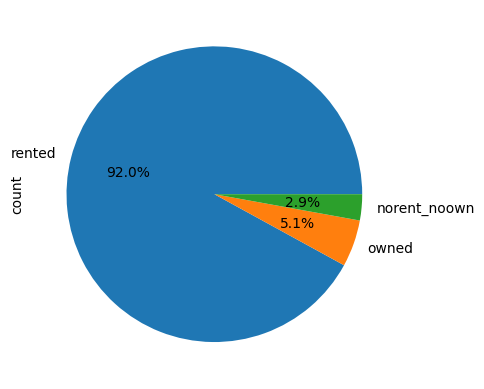

In [7]:
df['House_Ownership'].value_counts().plot.pie(autopct='%1.1f%%')

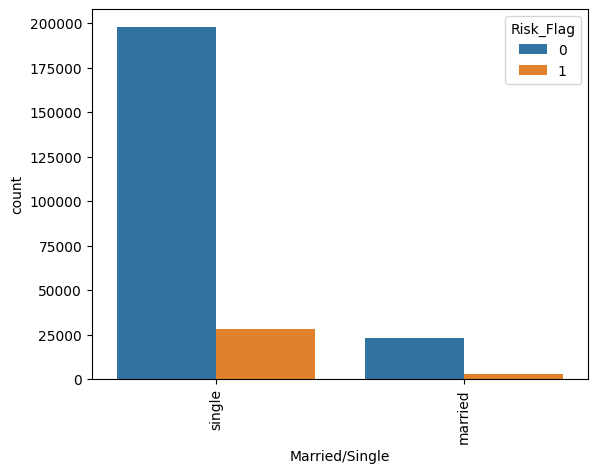

In [8]:
sns.countplot(x=df['Married/Single'],hue=df.Risk_Flag)
plt.xticks(rotation=90);

In [9]:
e={'no': 0, 'yes': 1}

In [10]:
df['Car_Ownership']=df['Car_Ownership'].map(e)

In [11]:
df.describe()

,Id,Income,Age,Experience,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,0.301587,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,0.458948,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,0.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,0.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,1.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,1.000000,14.000000,14.000000,1.000000


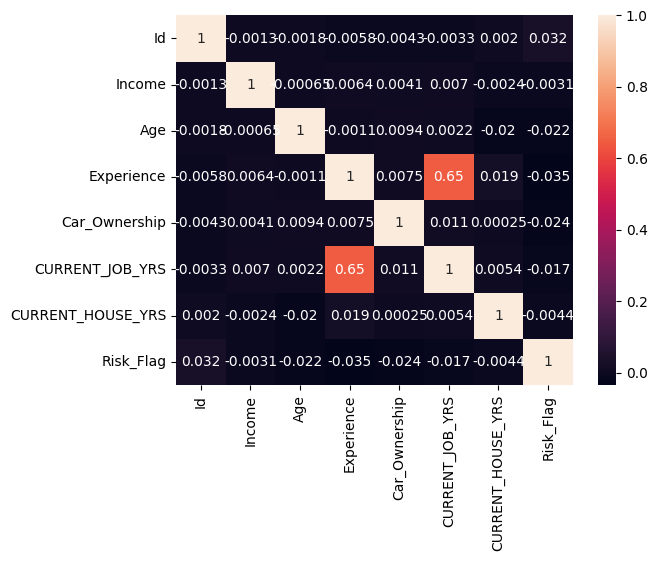

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

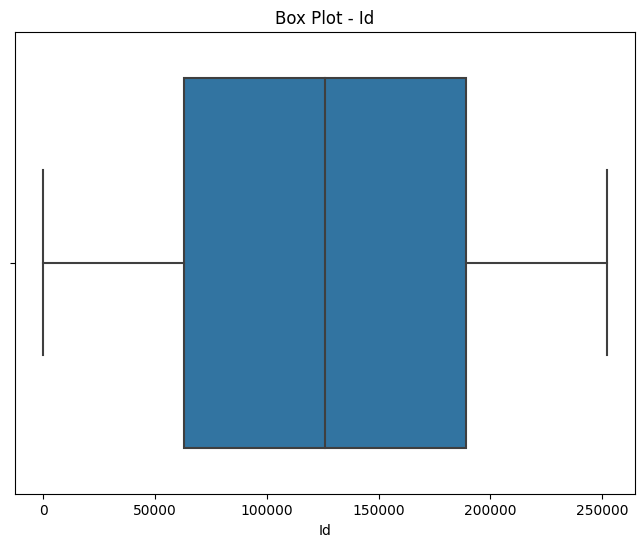

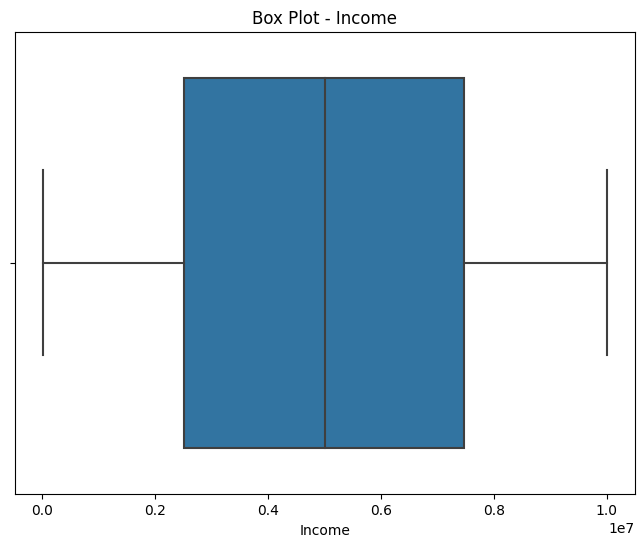

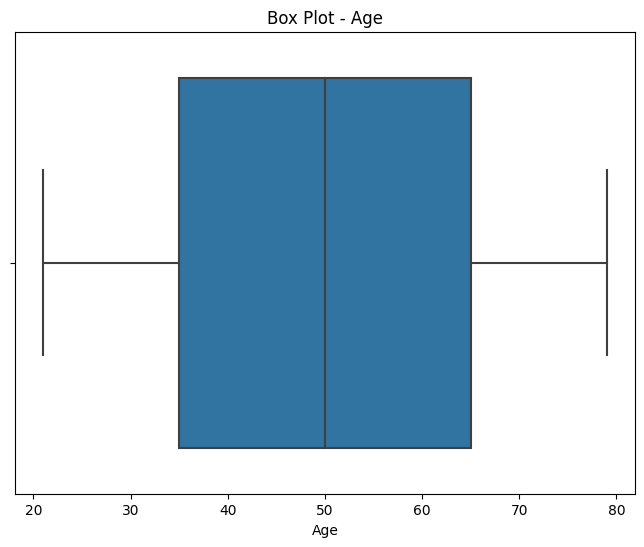

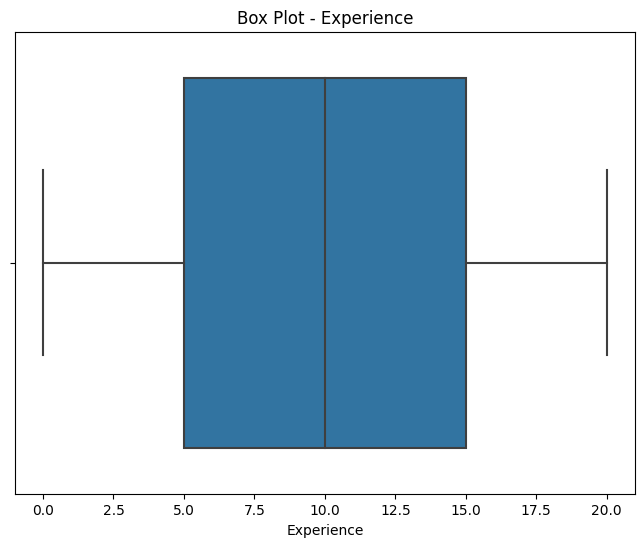

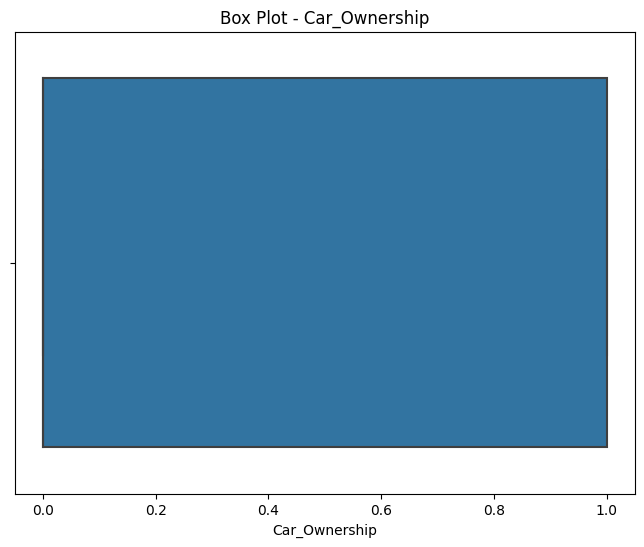

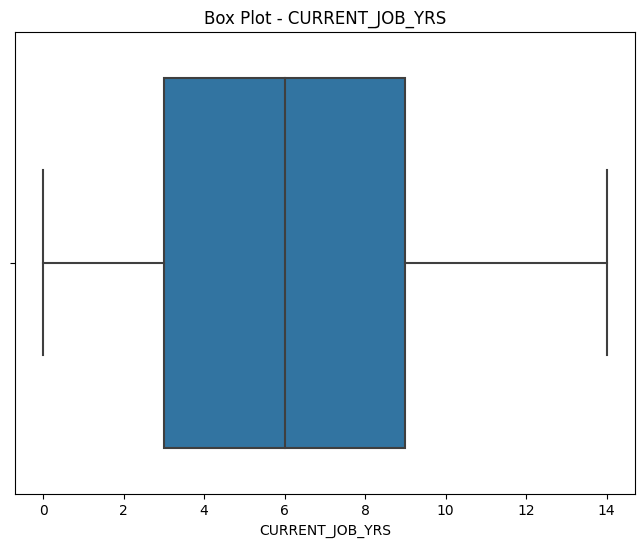

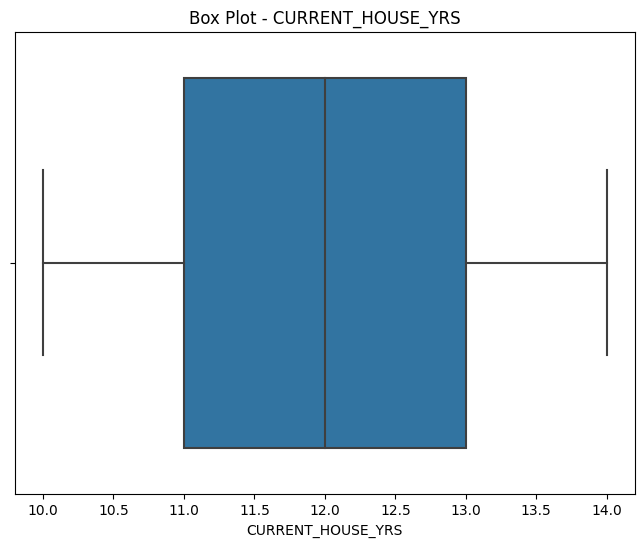

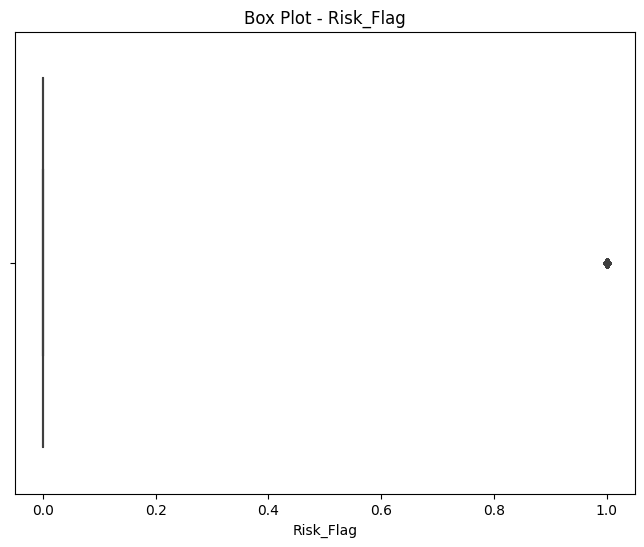

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]:  # Sadece sayısal sütunları işleyin
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [14]:
df=pd.get_dummies(df,drop_first=True)

In [15]:
x = df.drop(['Id', 'Risk_Flag'], axis=1)
y = df[['Risk_Flag']]

In [16]:
x.head()

,Income,Age,Experience,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Profession_Analyst,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,0,3,13,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,9,13,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,0,4,10,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,1,2,12,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,0,3,14,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [20]:
model=Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, verbose=1)

Epoch 1/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 4s 624us/step - accuracy: 0.8607 - loss: 0.3792 - val_accuracy: 0.8855 - val_loss: 0.2848
Epoch 2/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step - accuracy: 0.8855 - loss: 0.2855 - val_accuracy: 0.8897 - val_loss: 0.2607
Epoch 3/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 5s 757us/step - accuracy: 0.8896 - loss: 0.2632 - val_accuracy: 0.8921 - val_loss: 0.2493
Epoch 4/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 4s 554us/step - accuracy: 0.8924 - loss: 0.2518 - val_accuracy: 0.8912 - val_loss: 0.2453
Epoch 5/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step - accuracy: 0.8939 - loss: 0.2435 - val_accuracy: 0.8939 - val_loss: 0.2400
Epoch 6/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step - accuracy: 0.8942 - loss: 0.2392 - val_accuracy: 0.8915 - val_loss: 0.2389
Epoch 7/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 552us/step - accuracy: 0.8941 - loss: 0.2352 - val_accuracy: 0.8952 - val_loss: 0.2374
Epoch 8/30
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 534us/step - accuracy: 0.8945 -

In [22]:
loss,accuracy=model.evaluate(x_test,y_test)

1575/1575 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.8924 - loss: 0.2298


In [23]:
accuracy

0.8925198316574097

In [24]:
tahmin=model.predict(x_test)

1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step


In [25]:
model.save('loan.h5')

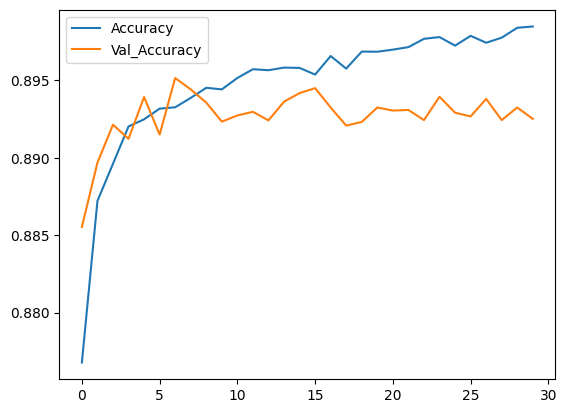

In [26]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

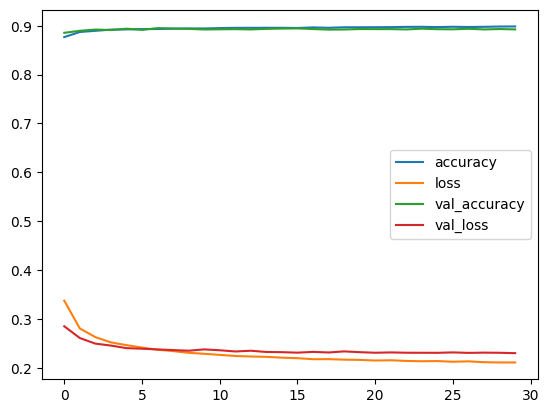

In [27]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [29]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[44147,     0],
       [ 6253,     0]])

In [30]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

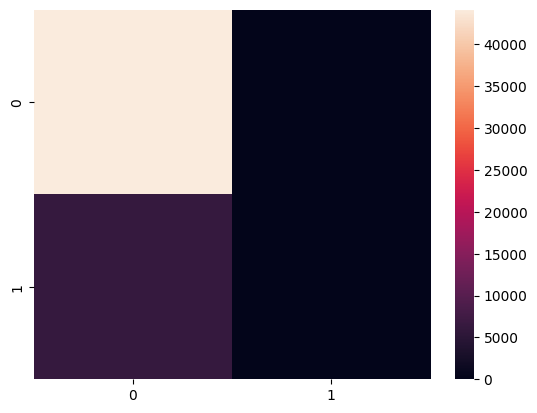

In [31]:

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [32]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



# accuracy: 0.8924 - loss: 0.2298
# With this model, banks can decide more quickly to whom they will give loans or not.